<a href="https://colab.research.google.com/github/rushikeshw791/Multiple-linear-regression-1/blob/main/Multi_linear_regression_toyota.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment**

Multi linear regression

toyotacorolla


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
# loading data
toyota=pd.read_csv('https://github.com/rushikeshw791/Multiple-linear-regression-1/files/9695856/ToyotaCorolla.csv',encoding='latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
toyota.shape

(1436, 38)

In [ ]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

**Performing EDA on data**

In [ ]:
# Consider only the below columns and prepare a prediction model for predicting Price.
toyota1=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota2=toyota1.rename({'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'qt','Weight':'weight'},axis=1)
toyota2.head()

,price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [ ]:
#duplicate values
toyota2[toyota2.duplicated()]

,price,age,km,hp,cc,doors,gears,qt,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
# drop duplicates
toyota3=toyota2.drop_duplicates().reset_index(drop=True)
toyota3

,price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
toyota3.describe()

,price,age,km,hp,cc,doors,gears,qt,weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


**Correlation Analysis**

In [ ]:
toyota3.corr()

,price,age,km,hp,cc,doors,gears,qt,weight
price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
km,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
hp,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
qt,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


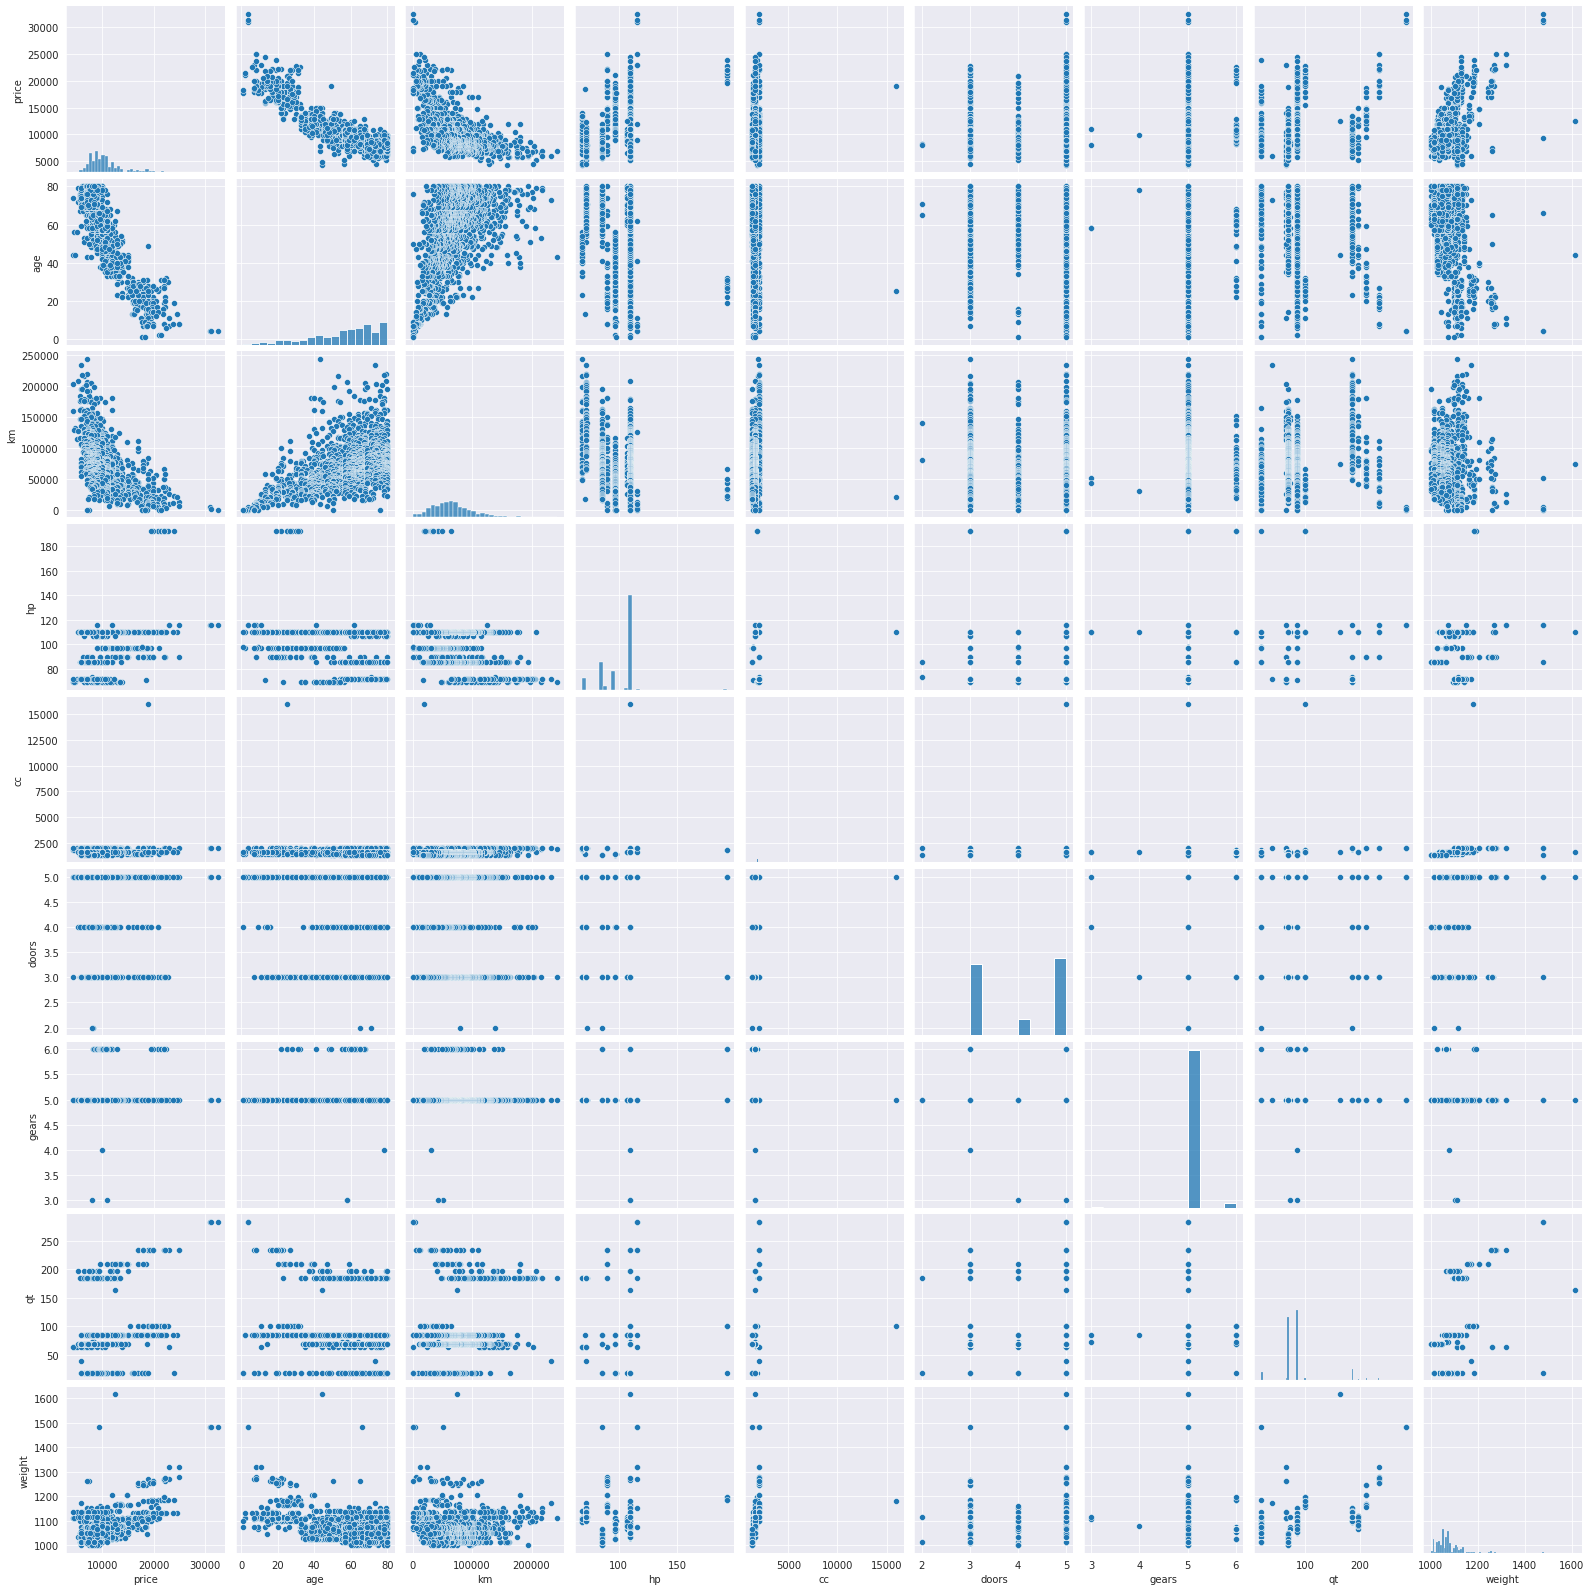

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota3)

**Model Building**

In [ ]:
model=smf.ols('price~age+km+hp+cc+doors+gears+qt+weight',data=toyota3).fit()

In [ ]:
model

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:34:14   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model Testing**

In [ ]:
# for coefficient parameters
model.params

Intercept   -5472.540368
age          -121.713891
km             -0.020737
hp             31.584612
cc             -0.118558
doors          -0.920189
gears         597.715894
qt              3.858805
weight         16.855470
dtype: float64

In [ ]:
# for tvalues and pvalues
model.tvalues , model.pvalues

(Intercept    -3.875273
 age         -46.551876
 km          -16.552424
 hp           11.209719
 cc           -1.316436
 doors        -0.023012
 gears         3.034563
 qt            2.944198
 weight       15.760663
 dtype: float64, Intercept     1.113392e-04
 age          1.879217e-288
 km            1.994713e-56
 hp            5.211155e-28
 cc            1.882393e-01
 doors         9.816443e-01
 gears         2.452430e-03
 qt            3.290363e-03
 weight        1.031118e-51
 dtype: float64)

In [ ]:
# for r squared values
model.rsquared , model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

Model accuracy is 86.17 %

In [ ]:
# Build SLR and MLR models for insignificant variables 'cc' and 'doors'
# Also find their tvalues and pvalues

In [ ]:
slr_cc=smf.ols('price~cc',data=toyota3).fit()

In [ ]:
slr_cc.tvalues , slr_cc.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64, Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

CC has significant pvalue

In [ ]:
slr_do=smf.ols('price~doors',data=toyota3).fit()
slr_do.tvalues , slr_do.pvalues

(Intercept    19.421546
 doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 doors        2.404166e-12
 dtype: float64)

Doors has significant values

**Model Validation Techniques**

1.Collinearity problem check

In [ ]:
#  calculate VIF = 1/(1-rsquare) for all independent variables
rsq_age=smf.ols('age~km+hp+cc+doors+gears+qt+weight',data=toyota3).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('km~age+hp+cc+doors+gears+qt+weight',data=toyota3).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('hp~km+age+cc+doors+gears+qt+weight',data=toyota3).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('cc~km+hp+age+doors+gears+qt+weight',data=toyota3).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('doors~km+hp+cc+age+gears+qt+weight',data=toyota3).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('gears~km+hp+cc+doors+age+qt+weight',data=toyota3).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=smf.ols('qt~km+hp+cc+doors+gears+age+weight',data=toyota3).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_weight=smf.ols('weight~km+hp+cc+doors+gears+qt+age',data=toyota3).fit().rsquared
vif_weight=1/(1-rsq_weight)

# putting the values in Dataframe format

d1={'variables':['age','km','hp','cc','doors','gears','qt','weight'],
    'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_weight]}
vif_df=pd.DataFrame(d1)
vif_df

,variables,vif
0,age,1.876236
1,km,1.757178
2,hp,1.419180
3,cc,1.163470
4,doors,1.155890
5,gears,1.098843
6,qt,2.295375
7,weight,2.487180


Here none variable has vif>20 , no collinearity , so consider all variables

**2.Residual Analysis**

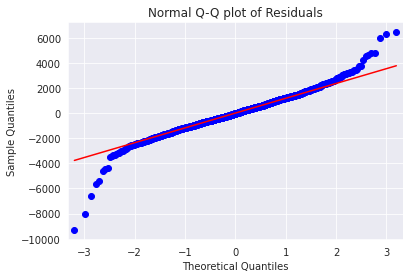

In [ ]:
# for normality of residuals (qq plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of Residuals")
plt.show()

In [ ]:
# outlier detection from above qq plot
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [ ]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [ ]:
# test for homoscedasticity or heteroscedasticity 
# (plotting model's standardizd fitted values vs standardized residual values)
# user defined z = (x-mu)/sigma
def standard_values(vals) : return (vals-vals.mean())/vals.std()

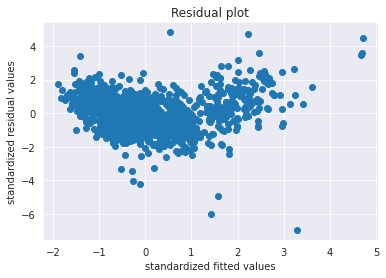

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 

using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig) 

exog = x-variable & endog = y-variable

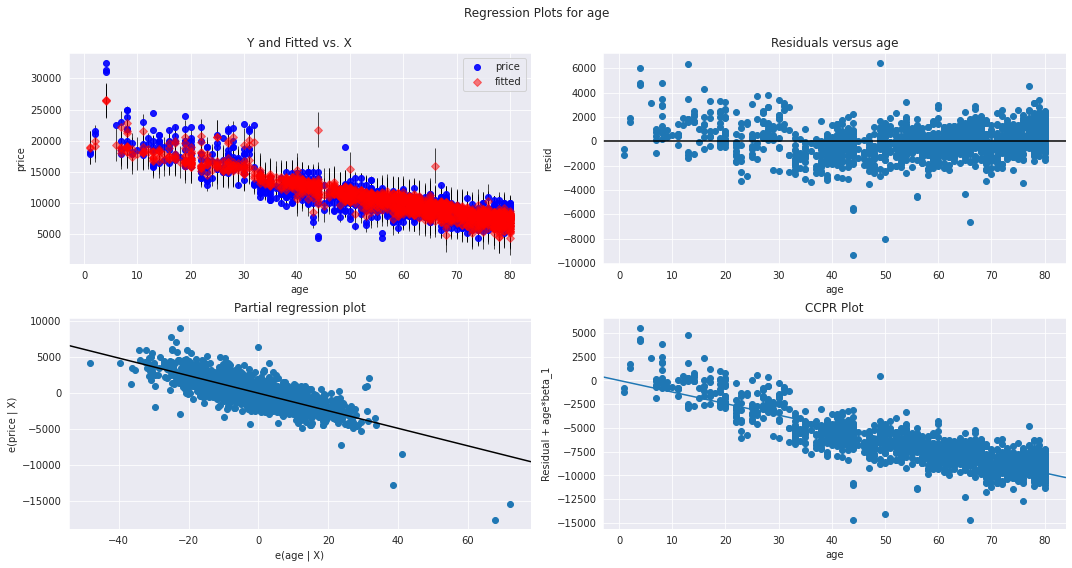

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

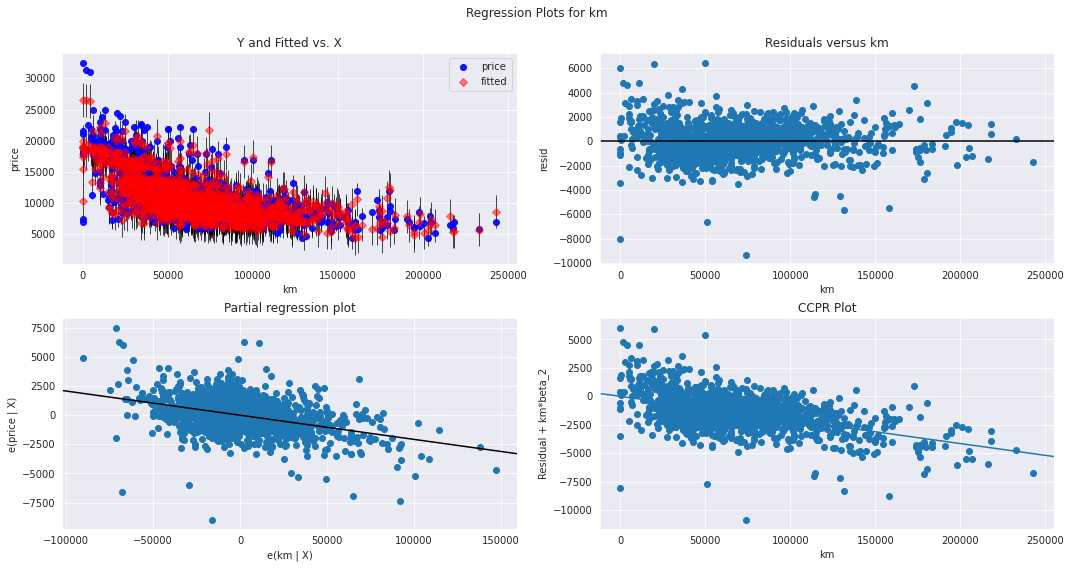

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'km',fig=fig)
plt.show()

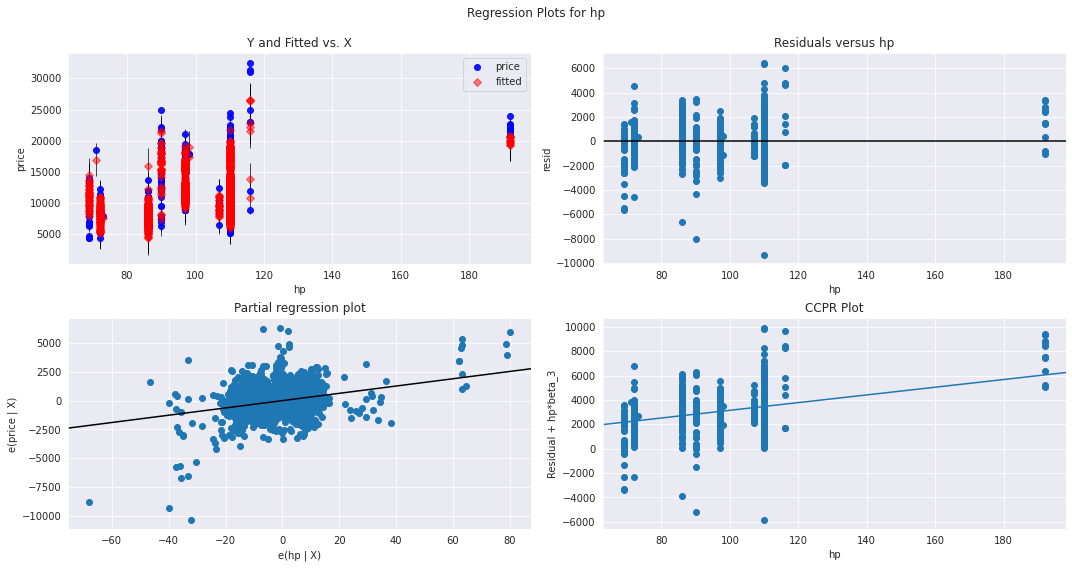

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'hp',fig=fig)
plt.show()

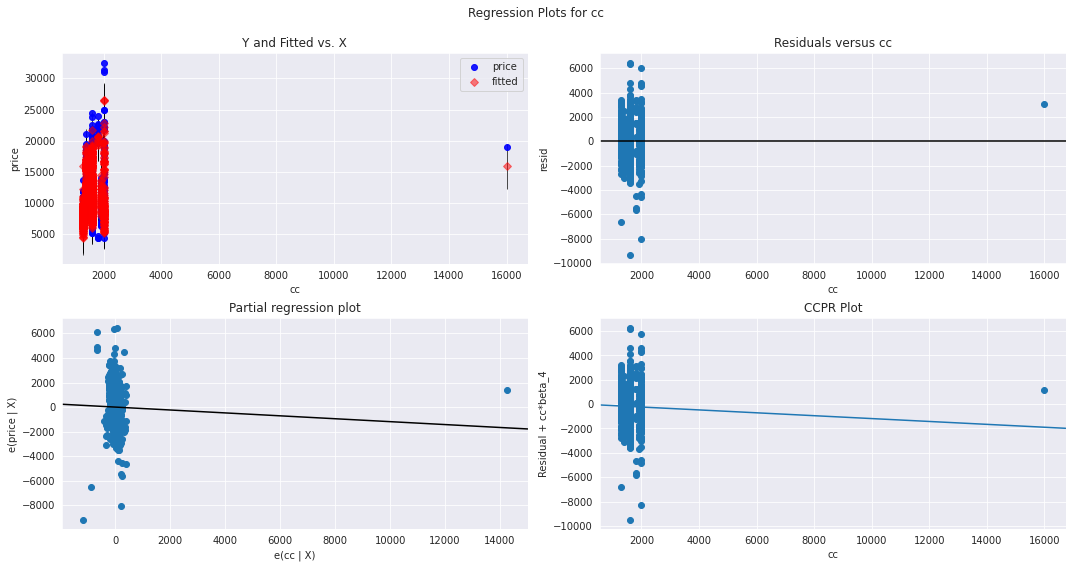

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

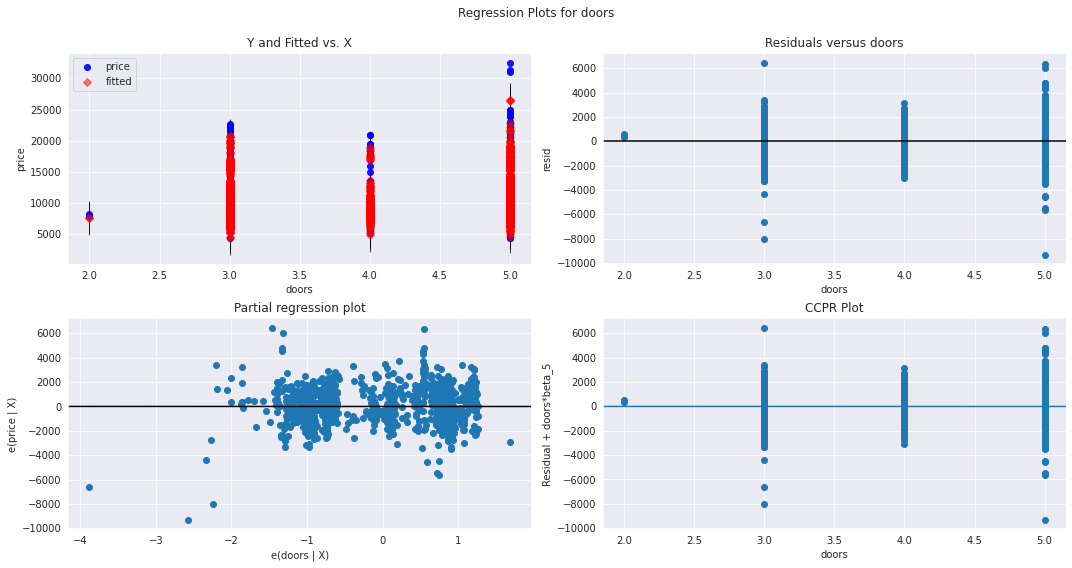

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'doors',fig=fig)
plt.show()

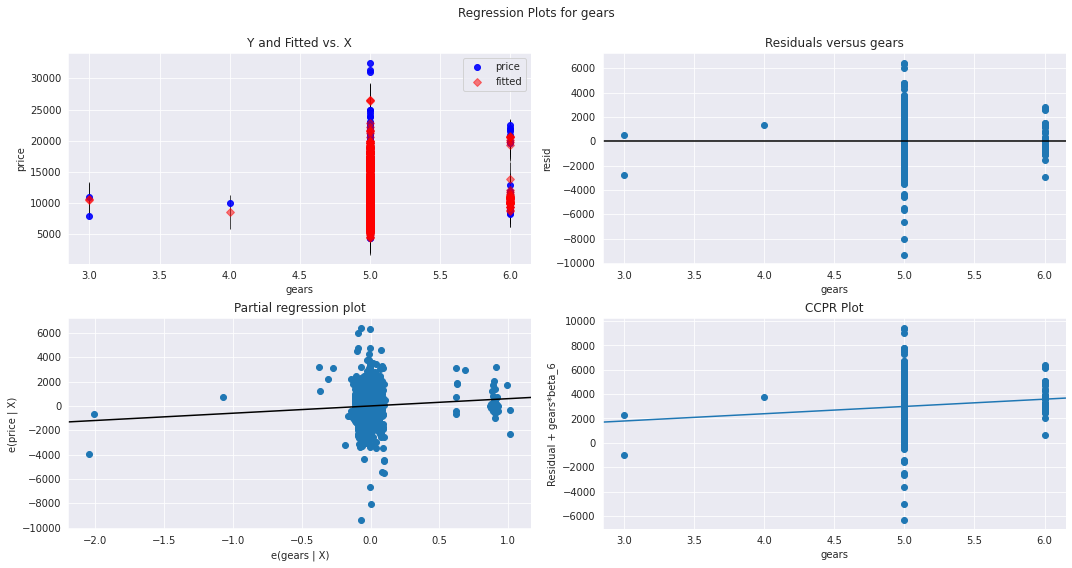

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'gears',fig=fig)
plt.show()

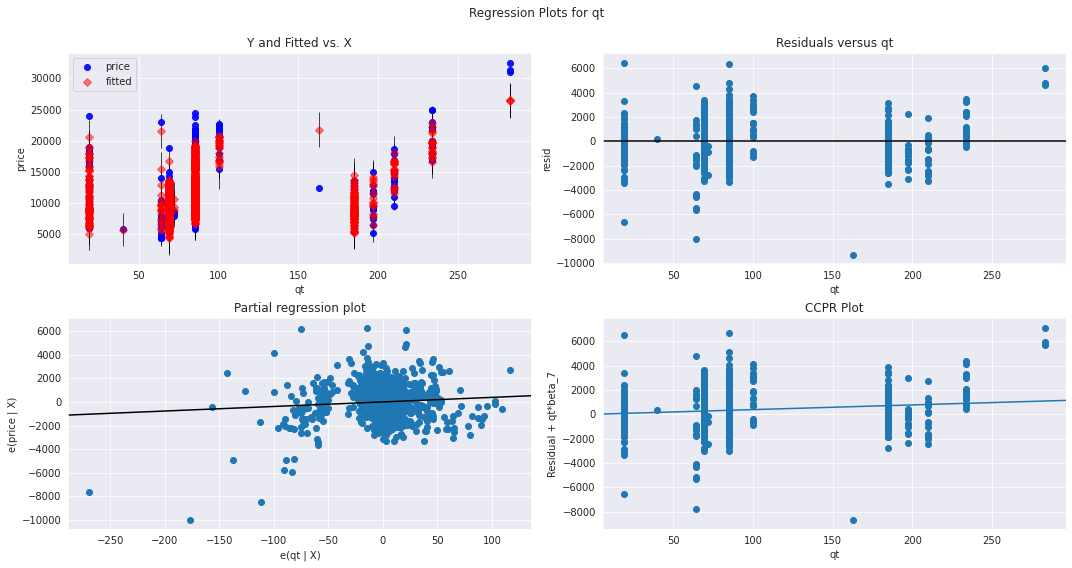

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'qt',fig=fig)
plt.show()

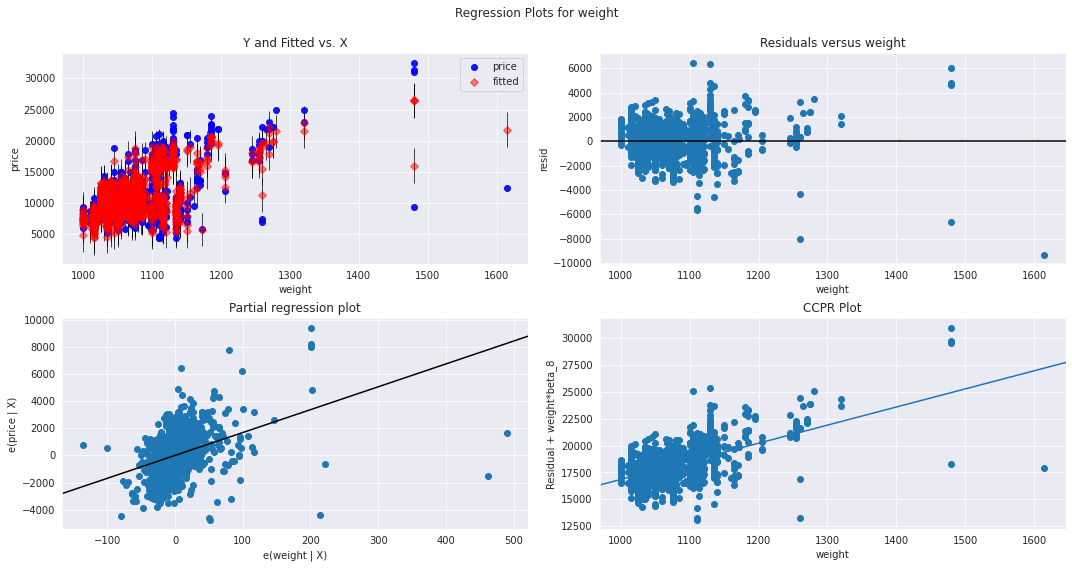

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'weight',fig=fig)
plt.show()

**Model delation diagnosis**

checking outliers or influencers

1.Cook's distance : if cook's distance > 1, then it's outlier

In [ ]:
# get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


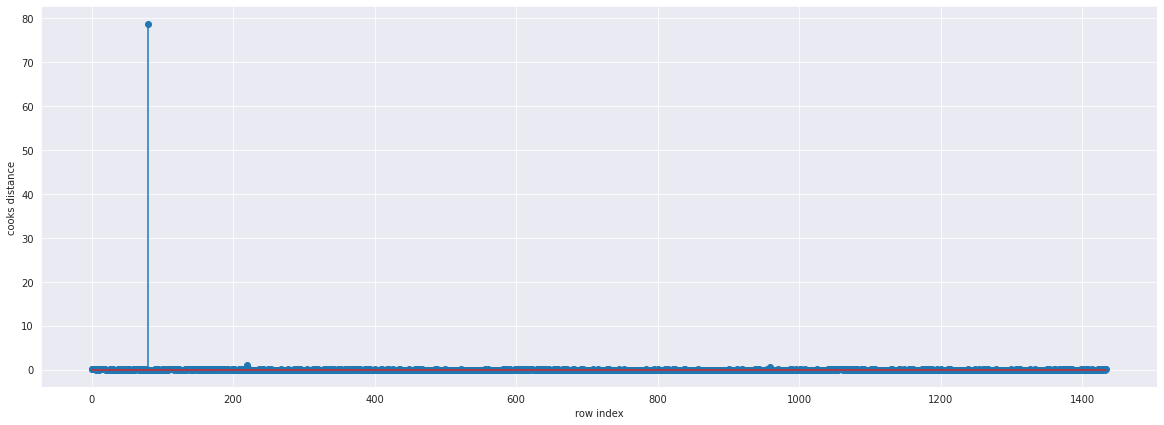

In [ ]:
# plotting the influencers using stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota3)),np.round(c,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [ ]:
# index and value of influencer where c>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258927)

**2.leverage value using high influence points**

points beyond leverage_cutoff value are influencers


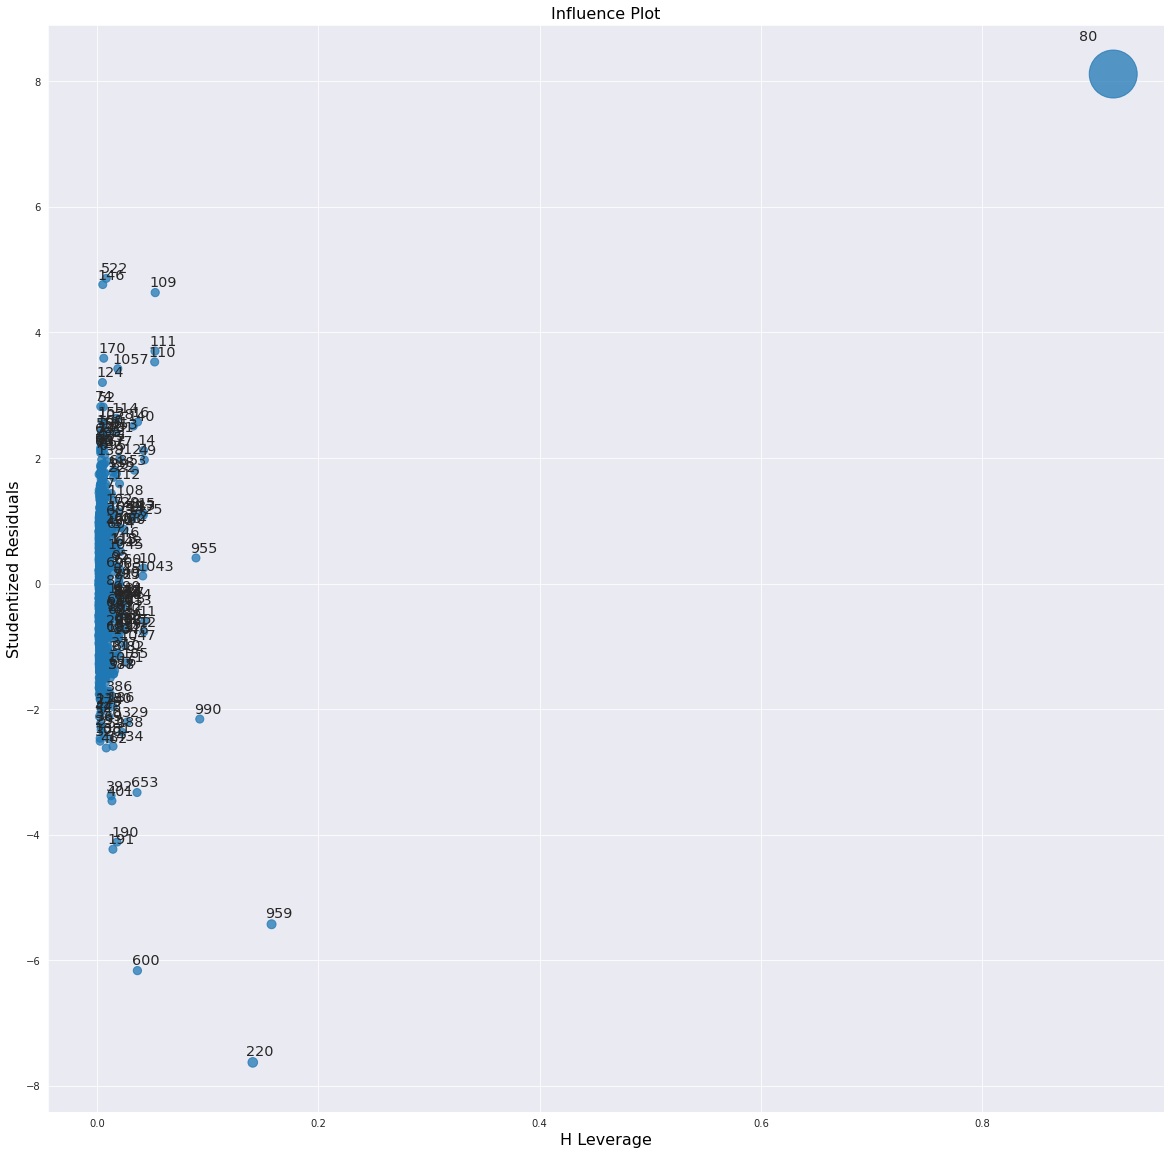

In [ ]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)

In [ ]:
#leverage cutoff value = 3*(k+1)/n 
# k= no. of features/columns
# n= no. of datapoints
k=toyota3.shape[1]
n=toyota3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [ ]:
toyota3[toyota3.index.isin([80])]

,price,age,km,hp,cc,doors,gears,qt,weight
80,18950,25,20019,110,16000,5,5,100,1180


**Improving the Model**

In [ ]:
# creating a copy of data so original dataset is not affected
toyota_new = toyota3.copy()
toyota_new

,price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
# discard the data points which are influencers and reassign the raw number (reset_index(drop=True))
toyota4 = toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True) 
toyota4

,price,age,km,hp,cc,doors,gears,qt,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


**Model delatin diagnosis and final model**


In [ ]:
while model.rsquared < 0.90:
  for c in [np.max(c)>0.5]:
    model=smf.ols('price~age+km+hp+cc+doors+gears+qt+weight',data=toyota4).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota4=toyota4.drop(toyota4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota4
  else:
    final_model=smf.ols('price~age+km+hp+cc+doors+gears+qt+weight',data=toyota4).fit()
    final_model.rsquared , final_model.aic
    print("thus model accuracy is improved to",final_model.rsquared)

thus model accuracy is improved to 0.8765926307402282
thus model accuracy is improved to 0.8839684606741538
thus model accuracy is improved to 0.8882395145171205
thus model accuracy is improved to 0.8902571486612915
thus model accuracy is improved to 0.8909888960319988
thus model accuracy is improved to 0.8922595280462808
thus model accuracy is improved to 0.8933621011392295
thus model accuracy is improved to 0.8947147371605557
thus model accuracy is improved to 0.8955233405057648
thus model accuracy is improved to 0.8930210061069088
thus model accuracy is improved to 0.8939546425147169
thus model accuracy is improved to 0.8954112430715817
thus model accuracy is improved to 0.8960182592139027
thus model accuracy is improved to 0.8968403506948497
thus model accuracy is improved to 0.8964026771830705
thus model accuracy is improved to 0.8958538146890626
thus model accuracy is improved to 0.8953750500147551
thus model accuracy is improved to 0.8949455651565241
thus model accuracy is impro

In [ ]:
final_model.rsquared

0.9003762532318559

Model accuracy is increased to 90.02%

In [ ]:
toyota4

,price,age,km,hp,cc,doors,gears,qt,weight
0,13750,23,72937,90,2000,3,5,210,1165
1,14950,26,48000,90,2000,3,5,210,1165
2,13750,30,38500,90,2000,3,5,210,1170
3,12950,32,61000,90,2000,3,5,210,1170
4,16900,27,94612,90,2000,3,5,210,1245
...,...,...,...,...,...,...,...,...,...
1325,8450,80,23000,86,1300,3,5,69,1015
1326,7500,69,20544,86,1300,3,5,69,1025
1327,10845,72,19000,86,1300,3,5,69,1015
1328,8500,71,17016,86,1300,3,5,69,1015


**Model prediction**

In [ ]:
# assume new data for prediction is
new_data=pd.DataFrame({'age':15,'km':40000,'hp':75,'cc':1400,'doors':4,'gears':5,'qt':70,'weight':1100},index=[0])
new_data

In [ ]:
# manual prediction of price
final_model.predict(new_data)

0    17049.802857
dtype: float64

In [ ]:
# automatic prediction of price with 90.02% accuracy
pred_y=final_model.predict(toyota4)
pred_y

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64